In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# K-Means and Clustering

Clustering algorithms are a part of machine learning that attempts to group, based on the features in the dataset, records into "clusters" of similar examples. Clustering is unsupervised - we don't know which groupings we'll end up with in advance (in contrast to something like logistic regression, where we know going in what the resulting classes are, we are just trying to fit each records into one of those groups)

## Unsupervised Learning

The clustering that we will look at here is an example of unsupervised learning, or machine learning models that do not have predefined labels like we had in classifications. Instead, the model will try to find patterns in the data and group them together based on the similarities in the data itself. We don't start knowing the possible outcomes, we give the data to the algorithm and it tells us what the groupings should be. 

### Clustering

Clustering is simple in concept, the goal is to group our data points into clusters, or groups of records that are the most similar to each other, and the most dissimilar to the records in other clusters. The main difference from classification is that we don't know what the clusters are going to be in advance. We feed in data, normally set the number of separate groups we want, and the algorithm figures out what the groups should be.

![Clustering](images/clustering.png "Clustering")

Clustering algorithms are common in the real world, in several applications. They are very helpful when we don't really know the end results that we are expecting. Some common applications of clustering algorithms are:
<ul>
<li> Customer segmentation - grouping customers into different groups based on their purchasing patterns, demographics, etc.
<li> Medical diagnosis - grouping patients into different groups based on their symptoms, etc.
<li> Social network analysis - grouping people into different groups based on their social connections, etc.
<li> Anomaly detection - looking for things that <i>don't</i> fit into the other groups well, as they may be things to investigate. 
</ul>

Clustering logic is also commonly used in conjuction with other algorithms. For example, we can use clustering to group our data into different groups, and then use classification on each group to get a more accurate result. We can also use it to help with smarter imputation. 

# K-Means 和聚類

聚類算法是機器學習的一部分，它試圖根據數據集中的特徵將記錄分組到類似示例的“集群”中。 聚類是無監督的——我們不知道我們會提前結束哪些分組

(與邏輯回歸之類的東西相反，我們知道結果類是什麼，我們只是試圖將每條記錄放入其中一個那些團體)

### Clustering 聚類

聚類在概念上很簡單，目標是將我們的數據點分組到集群中，或者是彼此最相似的記錄組，

以及與其他集群中的記錄最不相似的記錄組。 與分類的主要區別是我們不知道集群是什麼。

我們輸入數據，通常設置我們想要的獨立組的數量，然後算法計算出組應該是什麼。

### My First Cluster! Building to K-Means Clustering

We can cluster data using K-Means, first, we can make some simple data to cluster. We will use the make_blobs function to make 300 samples with 2 features, X and Y, which fall into 4 distinct clusters. We will then plot the data to see what it looks like.

我們可以使用 K-Means 對數據進行聚類，首先，我們可以將一些簡單的數據進行聚類。 

我們將使用 make_blobs 函數製作 300 個具有 2 個特徵 X 和 Y 的樣本，它們分為 4 個不同的簇。

然後我們將繪製數據以查看其外觀。

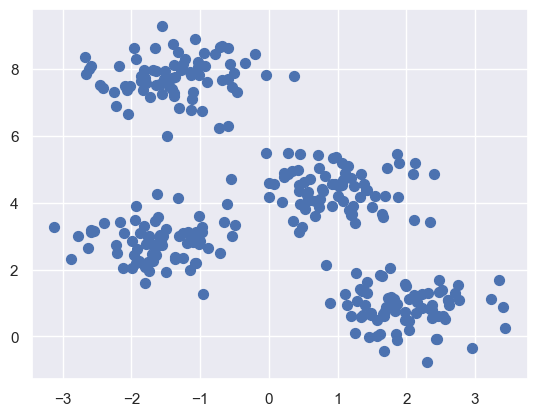

In [2]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

##### Visually Clustering our Blobs

We can look at the dummy data plotted above and it is pretty clearly broken up into 4 blobs that we can identify visually pretty easily. 

![Visual Clustering](images/visual_clusters.png "Visual Clustering")

Each group of points that I have circled is one "cluster" - here we eyeballed it; clustering algorithms will try to do this automatically by finding the points that are <b><i>most similar</i></b> to each other based on their features, which are X and Y here. 

#### Clustering with K-Means

We can use kmeans to create clusters similar to the above, but with some slightly more formal clustering than my freehand lines. Clustering works by finding these blobs of similar points, and grouping them into "like" groups similarly to how we do by eye. 

##### K-Means Clusters

The mechanics of this are very simple, we'll use the KMeans clustering function very similarly to how we use any model in scikit-learn. We'll create a KMeans object, and then fit it to our data, then generate predictions for each point in the data - or assign it to a cluster. The "Cluster" column that we see below is which of the 4 clusters that we saw above that each point is assigned to. The unsupervised factor here is that we don't have any idea which cluster is which, the alogrithm will assign them to the clusters that it thinks are most similar, but which group is "1', which is "2", etc. is unknown to us going in.

In clustering we don't really have the train/test split, because we don't have anything to test against. We just have the data, and we want to find the clusters - there's not right or wrong answer. 

#### 使用 K-Means 聚類

我們可以使用 kmeans 來創建與上面類似的聚類，但比我的手繪線條稍微正式一些。 

聚類的工作原理是找到這些相似點的斑點，並將它們分組為“相似”的組，類似於我們用眼睛所做的那樣。


##### K 均值集群

這個機制非常簡單，我們將使用 KMeans 聚類函數，就像我們在 scikit-learn 中使用任何模型一樣。 

我們將創建一個 KMeans 對象，然後將其擬合到我們的數據中，然後為數據中的每個點生成預測
- 或者將其分配給一個集群。 我們在下面看到的“集群”列是我們在上面看到的每個點分配給的 4 個集群中的哪一個。 

這裡的無監督因素是我們不知道哪個簇是哪個，算法會將它們分配到它認為最相似的簇，但是哪個組是“1”，哪個是“2”

在聚類中，我們實際上沒有訓練/測試拆分，因為我們沒有任何東西可以測試。 

我們只有數據，我們想找到集群——沒有正確或錯誤的答案。

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clusters = kmeans.predict(X)

## Create DataFrame with cluster labels for display
testdf = pd.DataFrame(X)
testdf['Cluster'] = clusters
testdf.head()

,0,1,Cluster
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1


##### Labels

Since our model was fitted to our data, we can shortcut the prediction step and just get the label with the labels_ attribute. This will give us the cluster that each point was assigned to, just as the prediction step did above. When we are using all of our data for fitting, this is exactly the same. 

<b>Note:</b> One important thing to remember in clustering is that the labels that the clustering algorithm assigns is just a number, it has no meaning outside of differentiating the clusters. So being in cluster 1 or 0 doesn't equate to True/False or any other external label. Which clustered group gets which label is 100% arbitrary. 

#### 標籤

由於我們的模型適合我們的數據，我們可以簡化預測步驟，只獲取具有 labels_ 屬性的標籤。 

這將為我們提供每個點被分配到的集群，就像上面的預測步驟一樣。 

當我們使用所有數據進行擬合時，這完全相同。

<b>注意：</b>在聚類中要記住的一件重要事情是，聚類算法分配的標籤只是一個數字，

除了區分聚類之外沒有任何意義。 所以在集群 1 或 0 中並不等同於真/假或任何其他外部標籤。 

哪個集群組得到哪個標籤是 100% 任意的。

In [4]:
clusters2 = kmeans.labels_

testdf2 = pd.DataFrame(X)
testdf2['Cluster'] = clusters2
testdf2.head()

,0,1,Cluster
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1


##### Plot Clusters

We can now plot the clusters that we have created, along with the center point of each cluster. 

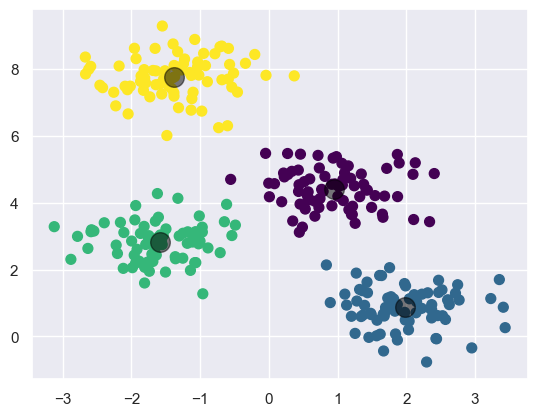

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


## Creating K-Means Clusters and Inertia

Much like logistic regression and gradient descent, clustering relies on an iteritive algorithm to find the corect clustering. In this case the algorithm attempts to minimise a metric called inertia. Inertia is the within-cluster sum-of-squares, roughly the compactness of each cluster. 

$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)  $

This calculation is just the sum of squares distance of each point to the center of that group. The algorithm is pretty simple as well:
<ul>
<li> Start with a random set of centroids.
<li> Assign each point to the closest centroid. 
<li> Calculate the inertia (above).
<li> Move the centroids to the center of the points that are assigned to that centroid. 
<li> Recalculate the inertia.
<li> Repeat this process until the inertia stops changing.
</ul>

![K-Means](images/kmeansMath.png "K-Means")

![K-Means Process](images/kmeansViz.png "K-Means Process")

While using this metric of inertia generates "tight" groupings, there are a few concerns:
<ul>
<li> The distance from the center point is radial. If there is an irregular pattern to the data distribution, this may not make sense. 
<li> When using high dimension data, the distances can inflate. Using an algorithm to reduce dimensionality like PCA can help this. 
</ul>

The cluster centers are randomly placed, then the inertia is calculated and the points are updated. This process uses something called Expectation Maximization, but the effect is exactly as though we were doing gradient descent with a cost function - eventually we converge on the solution. One issue is that, like with some gradient descent problems, we can have the optimized solution fall into a local minima, not the global solution. To combat this the kMeans built into sklearn defaults to using 10 iterations, in each one the starting point of the centroids is different, so we can likely avoid this. We can also call a paramater called "init" which changes the starting placement of the centroids from random to "k-means++" which looks at the data to generate smart starting points to speed convergance on a solution, and avoid local minima. 

We don't need to delve super deep into the math of how things work here, as long as we understand that the algorithm iteritively persues the best solution, or the lowest interita, we are good. 

## 創建 K-Means 集群和慣性

與邏輯回歸和梯度下降非常相似，聚類依賴於迭代算法來找到正確的聚類。 

在這種情況下，算法會嘗試最小化稱為慣性的度量。 慣性是簇內平方和，大致是每個簇的緊湊度。

該計算只是每個點到該組中心的距離的平方和。 該算法也非常簡單：
<ul>
<li> 從一組隨機的質心開始。
<li> 將每個點分配給最近的質心。
<li> 計算慣性（上）。
<li> 將質心移動到分配給該質心的點的中心。
<li> 重新計算慣性。
<li> 重複這個過程，直到慣性停止變化。
</ul>

聚類中心隨機放置，然後計算慣量並更新點。 

這個過程使用了一種叫做期望最大化的東西，但效果就像我們用成本函數做梯度下降一樣——最終我們收斂於解決方案。 

一個問題是，與某些梯度下降問題一樣，我們可以讓優化解落入局部最小值，而不是全局解。 

為了解決這個問題，sklearn 中內置的 kMeans 默認使用 10 次迭代，

每次迭代中質心的起點都不同，因此我們可以避免這種情況。 

我們還可以調用一個名為“init”的參數，它將質心的起始位置從隨機更改為“k-means++”，


它查看數據以生成智能起點以加速解決方案的收斂，並避免局部最小值。

### Clustering Example

Using real data, we'll cluster the diabetes havers/not havers based on their metrics. 

In [6]:
#Load Data
df = pd.read_csv("data/diabetes.csv")
df.drop(columns={"Outcome"}, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Scale and PCA Data

Here we'll scale the data and also run it through PCA so we can project it into 2D for visualization. Our data is currently in 8 dimensions - we can't really draw that effectively. Using PCA to make visualization easier for high dimension data is pretty common. For example, song data is analyzed by people like Spotify, and they produce visualizations to illustrate aspects of their analysis:

![PCA Visualization](images/pca_cluster_songs.png "PCA Visualization")

These projections down to 2 dimensions for visualizing data are hit and miss in terms of how "good" they are at showing the data. There is obvoiusly a lot of information lost in the process, but the alternative is not being able to visualize the data at all. When looking at clustering, these visualizations are pretty common, as seeing the differnet clusters is something you probably want to be able to do.

### 比例和 PCA 數據

在這裡，我們將縮放數據並通過 PCA 運行它，以便我們可以將其投影到 2D 中以進行可視化。 

我們的數據目前是 8 維的——我們無法真正有效地繪製它。 使用 PCA 使高維數據的可視化更容易是很常見的。

例如，歌曲數據由 Spotify 等人分析，他們製作可視化來說明他們分析的各個方面：


這些用於可視化數據的二維投影在顯示數據方面的“好”程度方面受到了打擊和失敗。 

在此過程中顯然丟失了很多信息，但另一種選擇是根本無法可視化數據。 

在查看集群時，這些可視化非常常見，因為您可能希望能夠看到不同的集群。

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_clus = MinMaxScaler().fit_transform(df)
X_c = PCA(2).fit_transform(X_clus)

### Plot Clusters

We need to specify the number of clusters to produce. We can plot several selections of k and see visually how well that fits our data. 

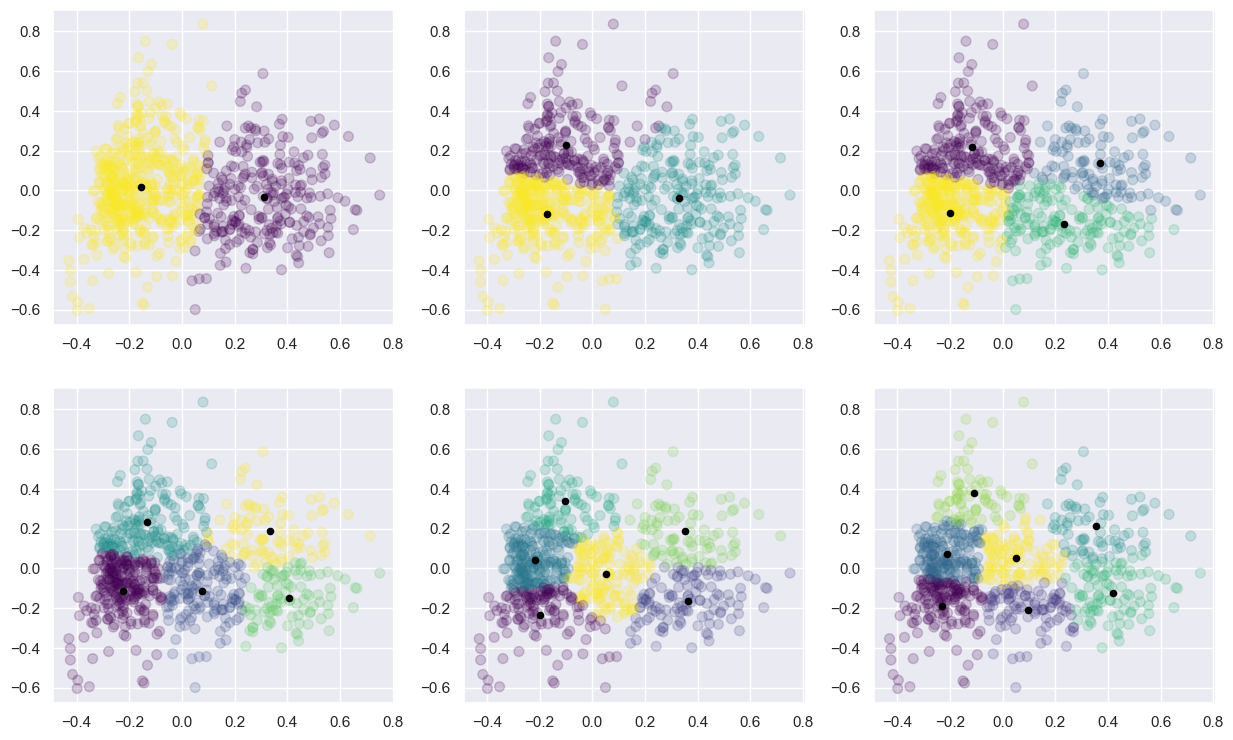

In [8]:
nc = [2,3,4,5,6,7]
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
row = 0
col = 0
for n in nc:
    kmeans = KMeans(n_clusters=n, max_iter=1000)
    kmeans.fit(X_c)
    y_kmeans = kmeans.predict(X_c)
    ax[row][col].scatter(X_c[:,0], X_c[:,1], c=y_kmeans, s=50, cmap='viridis', alpha=.2)
    centers = kmeans.cluster_centers_
    #print(centers)
    ax[row][col].scatter(centers[:, 0], centers[:, 1], c='black', s=20)
    col += 1
    if col >= 3:
        col = 0
        row += 1
plt.show()


## How Many Clusters Should I Have?

How many clusters should we have? If our data is easy to visualize, we can just look at it. If it isn't, we need some analysis. Two ways are:
<ul>
<li> Elbow method - like with PCA, we can plot the inertia and choose where it flattens. Just like the scree plot. 
<li> Silhouette - measure of how similar points are within a cluster compared to the distance from other clusters. Basically a measure of separation between clusters, analagous to the division boundaries we looked at with SVMs. We want high silhouette scores. 
    <ul>
    <li><b> Note: this is a little more elaborate, we'll look at the scores, but stick with the elbow method for now. </b>
    </ul>
</ul>

These methods can be used in cocert with each other to determine optimal number of clusters. 

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


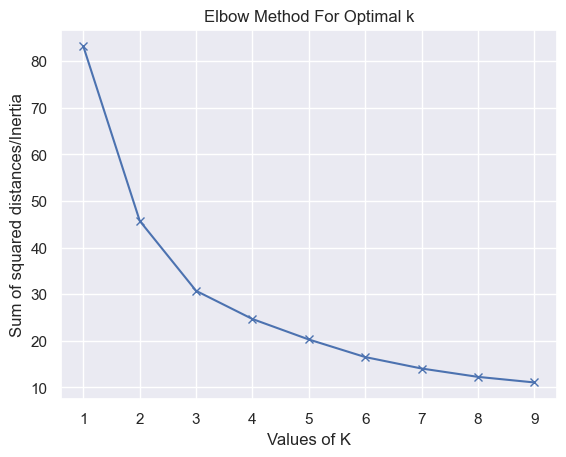

In [9]:
# Elbow Method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_c)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

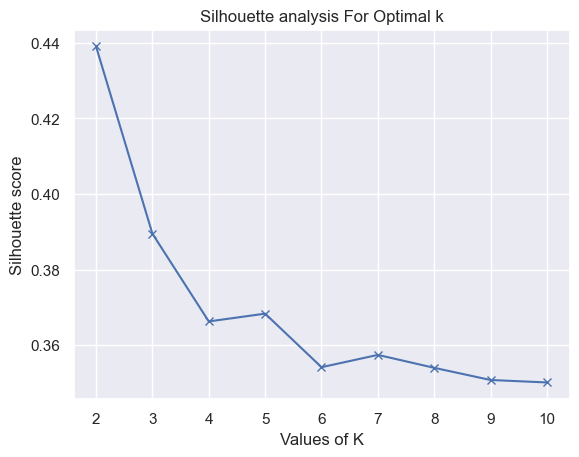

In [10]:
#Silhouette Score
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_c)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X_c, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

### Example - Clustering Digits

We can try to cluster the digits that we looked at previously. We can try to group the drawings into digits without using their labels. 

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
Xp = digits.data
yp = digits.target
Xp.dtype
yp.dtype

dtype('int32')

For this we know that we'll need 10 clusters (think about this number a bit...), so that part is easy. 

In [12]:
kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(Xp)
kmeans.cluster_centers_.shape


(20, 64)

#### Plot the "Average" Digit

We can plot the center of each cluster. These centers are each 64 dimension points - one for each feature. The center is the middle of each cluster, so it isn't the "most average" one of the images that we started with, it is the average of all the pixels of each drawing of that number. Or more accurately the average of all the pixels of each digit that got clustered together - correctly or incorrectly. We are creating a new image, the one that is the actual average of all the images in that cluster.

This concept is something that we'll use more later - once we fit a clustering algorithm to our data, the model "knows" what each cluster "looks like".

#### 繪製“平均”數字

我們可以繪製每個集群的中心。 這些中心各有 64 個維度點 - 每個特徵一個。 

中心是每個簇的中間，因此它不是我們開始時“最平均”的圖像之一，它是該數字的每張圖的所有像素的平均值。 

或者更準確地說，是聚集在一起的每個數字的所有像素的平均值——正確或錯誤。 

我們正在創建一個新圖像，該圖像是該集群中所有圖像的實際平均值。

我們稍後會更多地使用這個概念——一旦我們將聚類算法應用於我們的數據，模型就會“知道”每個聚類“看起來像”什麼。

ValueError: cannot reshape array of size 1280 into shape (10,8,8)

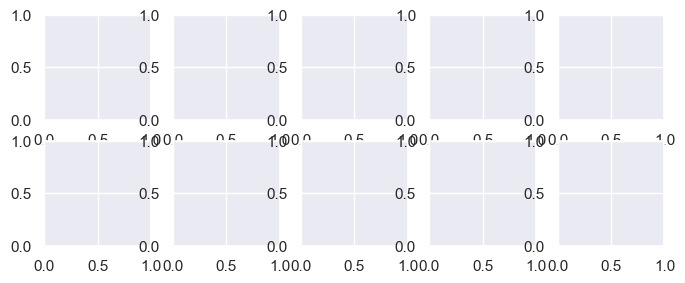

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Digits are Grouped!

We don't know the classes going in, but our clustering has managed to group the digits pretty well! 

#### But What ARE the Predictions?

Clustering doesn't know anything about the labels of our digits, all it is doing is grouping together the similar pieces of data and giving each group some arbitrary label - group 1, group 2, etc... To figure out which are correct or incorrect we need to label each group. To do so, we'll take the mode, or most frequent, from the set of labels. We can then check an entire group against the correct label. This is a key characteristic of unsupervised learning - we aren't putting things into classes that we know, like a classification model, we are looking <i>only</i> at the data, and putting that data into groups, each of which we don't know what that group is, only that the elements in it are similar. 

We generally don't know labels at when clustering, but since this is a trial run, we do. We can pull those in to check our accuracy. This isn't a standard action, we are just doing a check. 

#### 但是預測是什麼？

聚類對我們數字的標籤一無所知，它所做的只是將相似的數據分組在一起，

並為每組賦予一些任意標籤——第 1 組、第 2 組等……以確定哪些是正確的或 不正確，我們需要標記每個組。 

為此，我們將從標籤集中獲取模式或最頻繁的模式。 然後我們可以根據正確的標籤檢查整個組。 

這是無監督學習的一個關鍵特徵——我們不會將事物放入已知的類別中，

例如分類模型，我們<i>僅</i>查看數據，並將這些數據分組，每個我們不知道那個組是什麼，只知道其中的元素是相似的。

我們通常不知道聚類時的標籤，但由於這是試運行，我們知道。 

我們可以把它們拉進來檢查我們的準確性。 這不是一個標準動作，我們只是在做一個檢查。

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(yp[mask])[0]

C:\Users\Elsa\AppData\Local\Temp\ipykernel_22684\1955761569.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(yp[mask])[0]


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(yp, labels)

0.5147468002225932

Text(110.44999999999997, 0.5, 'predicted label')

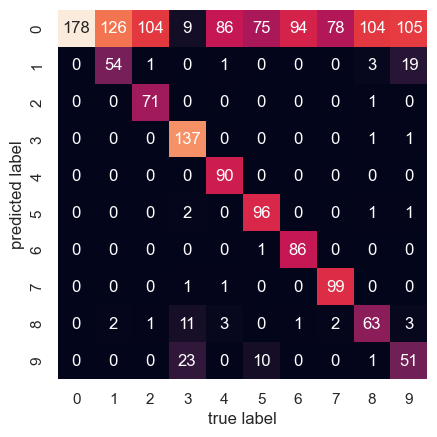

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Results

We didn't do too badly! Most errors are what we'd expect, especially with such low resolution digits. Things that are similar, like skinny 8s and 1s, or 8s and 9s are often confused, other than those we are quite accurate. 

But can we do better...

## t-Distributed Stochastic Neighbor Embedding 

t-SNE is t-Distributed Stochastic Neighbor Embedding - a dimension reduction technique that is non-linear, probabilistic, and typically used to project high dimension data to a 2D plot. tSNE is new - invented in 2008. 

tSNE does the same basic thing as PCA, it takes a dataset that has a high number of dimensions and translates it to a lower number of dimensions. The math behind the scenes is different, and pretty complex. tSNE is a type of manifold learning - or non-linear dimension reduction - in contrast to PCA and LSA which are both linear techniques. This gives tSNE an advantage that it is often able to better project high dimension data in a way that makes good visualizations - which is the primary use. We'll look at tSNE a little more when we do larger data with neural networks. Here, we can use tSNE as a dimension reduction tool just as we would PCA. 

#### How tSNE Works

tSNE very roughly measures the distance between points in space - N dimensional space where N is the dimensionality of the data. These distances are then used with a t-distribution (hence the t) to generate probabilities of the relative similarities between points. These are then mapped down to 2 (usually) dimensions randomly, based on the probability. This is a very loose generalization, details are here: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a but it goes well beyond what we need to care about. We can treat tSNE as a more flexible PCA here and cut our dimensions from 64 to 2. 

## t-分佈式隨機鄰居嵌入

t-SNE 是 t-分佈式隨機鄰域嵌入——一種非線性、概率性的降維技術，通常用於將高維數據投影到二維圖。 

t-SNE 是新的 - 於 2008 年發明。

tSNE 做與 PCA 相同的基本事情，它採用具有高維數的數據集並將其轉換為較低維數。 

幕後的數學是不同的，而且非常複雜。 tSNE 是一種流形學習 - 或非線性降維 - 與都是線性技術的 PCA 和 LSA 形成對比。 

這給 tSNE 帶來了一個優勢，它通常能夠以一種產生良好可視化效果的方式更好地投影高維數據——這是主要用途。

當我們使用神經網絡處理更大的數據時，我們將更多地關注 tSNE。 

在這裡，我們可以像使用 PCA 一樣使用 tSNE 作為降維工具。

#### tSNE 的工作原理

tSNE 非常粗略地測量空間中點之間的距離 - N 維空間，其中 N 是數據的維數。 

然後將這些距離與 t 分佈（因此為 t）一起使用，以生成點之間相對相似性的概率。 

然後根據概率將這些隨機映射到 2（通常）維度。 

這是一個非常寬鬆的概括，詳情在這裡：https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a 

但它遠遠超出了我們需要關心的範圍。 我們可以在這裡將 tSNE 視為更靈活的 PCA，並將我們的維度從 64 減少到 2。

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Elsa\AppData\Local\Temp\ipykernel_22684\2623282342.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.8914858096828047

#### Plot tSNE Projections

We can plot the tSNE projections for the clusters. Since the data is in 2D, we can visualize it.  

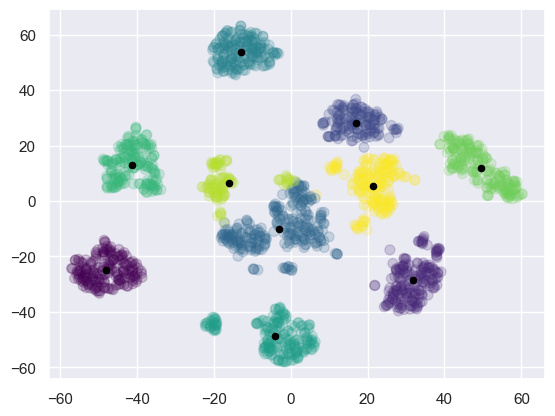

In [18]:
plt.scatter(digits_proj[:,0], digits_proj[:,1], c=clusters, s=50, cmap='viridis', alpha=.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

### tSNE and Plotting High Dimension Data and Perplexity

As an example, we can plot something in lots of dimensions into fewer - the breast cancer dataset. This dataset has 30 dimensions, so doing a scatter plot of the data the "normal" way would require just selecting 2 dimensions to use. Here we can project those 30 dimensions down to 2, so we can visualize our data. 

In [19]:
from sklearn.datasets import load_breast_cancer
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(load_breast_cancer())
y1 = df["target"]
X1 = df.drop(columns="target")
red = y1 == 0
green = y1 == 1
X1 = MinMaxScaler().fit_transform(X1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Projection with PCA

First, we can use PCA to reduce this to 2 dimensions and see what we get. We'll color the data according to it's true label, so we can visually see the separation when plotted. 

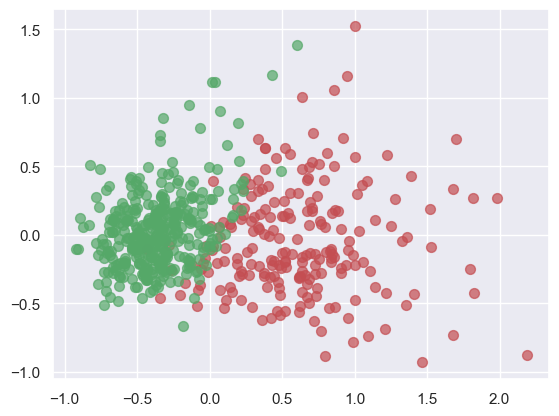

In [20]:
#PCA
b_PCA = PCA(2).fit_transform(X1)
plt.scatter(b_PCA[red,0], b_PCA[red,1],s=50, c='r', alpha=.7)
plt.scatter(b_PCA[green,0], b_PCA[green,1], s=50, c='g', alpha=.7)

### Now tSNE

The tSNE projections will vary, you may get one that is quite different. 

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


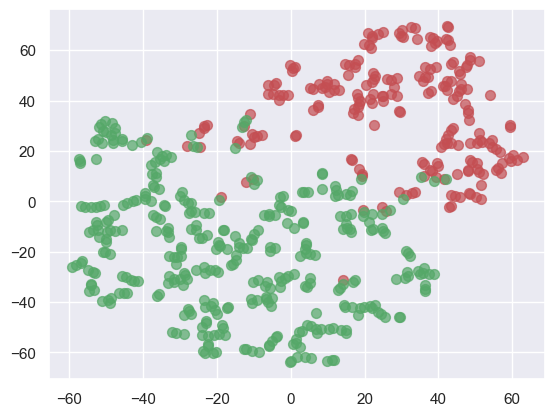

In [21]:
# tSNE
#b_tSNE = TSNE(n_components=2, init='random', perplexity = 30).fit_transform(X1)
b_tSNE = TSNE(n_components=2, perplexity = 5).fit_transform(X1)
plt.scatter(b_tSNE[red,0], b_tSNE[red,1],s=50, c='r', alpha=.7)
plt.scatter(b_tSNE[green,0], b_tSNE[green,1], s=50, c='g', alpha=.7)

### Perplexity

Perplexity is an argument for tSNE, it can radically change the projection that we get. Perplexity roughly controls how local vs global the algorithm looks when trying to find structure in the data. Higher perplexities cause the algorithm to look more globally at the data - so it will look for relationships between points that are "farther apart" (in N-dimensional space). Lower perplexities cause the algorithm to look more locally. Typical values are around 5 to 50, when visualizing, we kind of need to guess and check. There is a very good explainer of tSNE along with many good visualizations here: https://distill.pub/2016/misread-tsne/ 

As the perplexity changes we can sometimes get shapes and patterns in the data. 

### 困惑

困惑是 tSNE 的一個參數，它可以從根本上改變我們得到的投影。 

困惑度粗略地控制算法在嘗試查找數據結構時的局部與全局外觀。 

更高的困惑度導致算法更全面地查看數據 - 因此它將尋找“相距更遠”（在 N 維空間中）的點之間的關係。 

較低的困惑導致算法看起來更局部。 典型值在 5 到 50 左右，在可視化時，我們有點需要猜測和檢查。 

這裡有一個非常好的 tSNE 解釋器以及許多好的可視化效果：https://distill.pub/2016/misread-tsne/

隨著困惑度的變化，我們有時可以在數據中獲得形狀和模式。

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The de

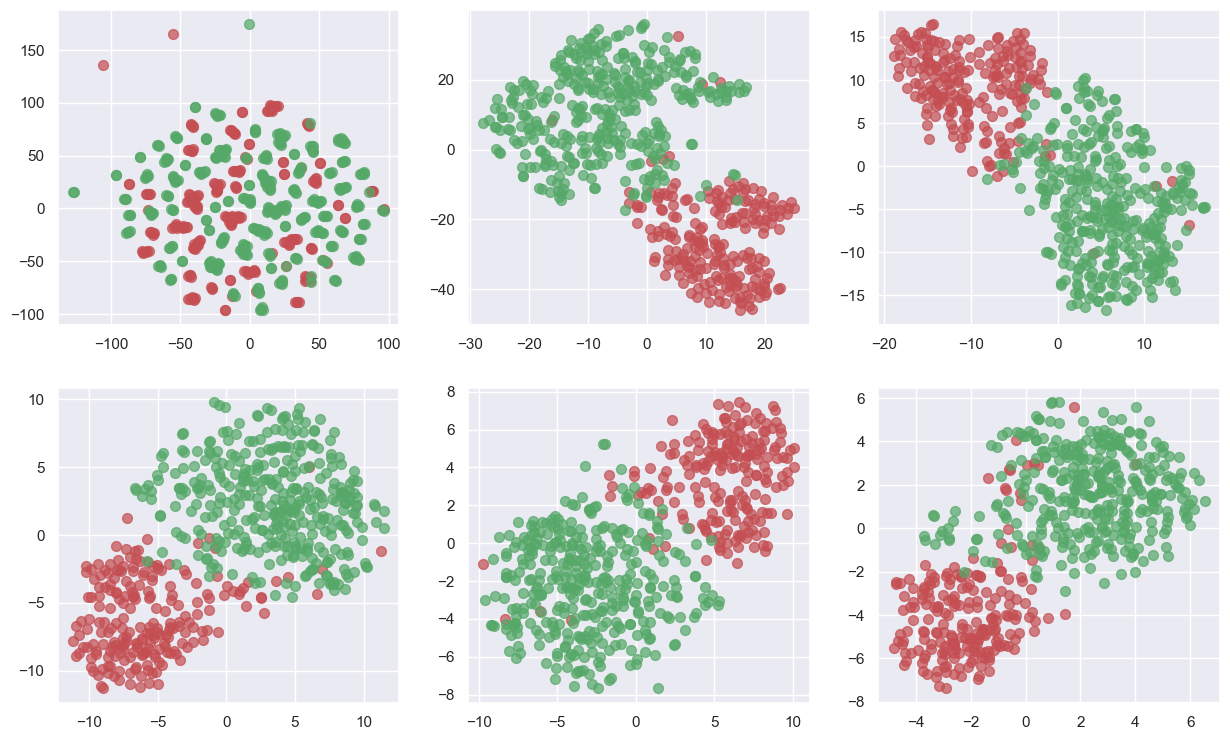

In [22]:
#Plot several perplexities
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
row = 0
col = 0
perp = [1,25,50,75,100,150]
for p in perp:
    b_tSNE = TSNE(n_components=2, init='random', perplexity = p).fit_transform(X1)
    ax[row][col].scatter(b_tSNE[red,0], b_tSNE[red,1],s=50, c='r', alpha=.7)
    ax[row][col].scatter(b_tSNE[green,0], b_tSNE[green,1], s=50, c='g', alpha=.7)
    col += 1
    if col >= 3:
        col = 0
        row += 1
plt.show()

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


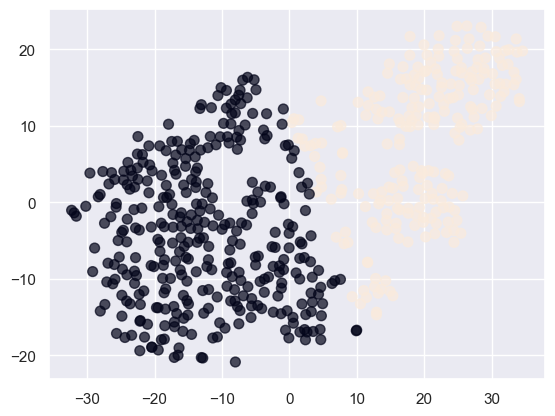

In [23]:
#### Cluster the Breast Cancer Data
b_tSNE = TSNE(n_components=2, init='random', perplexity = 30).fit_transform(X1)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(b_tSNE)
plt.scatter(b_tSNE[:,0], b_tSNE[:,1],s=50, c=clusters, alpha=.7)

### What Should the Perplexity Be?

This is a question that we only care a little bit about, and don't have a conclusive rule for. The 5 to 50 guideline above is a good starting point, for large datasets we may want to try higher values. We aren't going to get too far into tuning the tSNE results, if we are using it for dimensional reduction, we can try a few values in a grid search and see what works best. There is a comprehensive article on tunin tSNE here, but it really isn't something that we'll be focusing on: https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868 

#### Number of Components

tSNE is very commonly used to reduce data to 2 dimensions so we can visualize high dimension data. If we are using tSNE to do dimension reduction, we can use the same methods as we did with PCA to determine the number of clusters. 

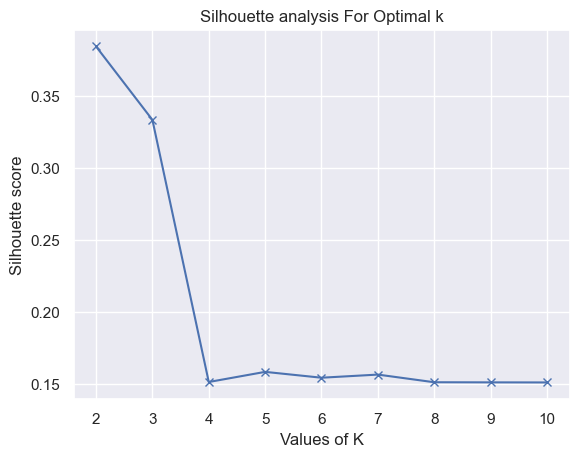

In [24]:
#Silhouette Scores
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

### tSNE Conclusion

tSNE is basically a functional equivalent to PCA that does not depend on linear relationships. 

We can use it to reduce dimensions just like PCA. Generally, we'd want to try it after PCA, or if PCA seems to not do a great job with our data. It is way slower

The primary use of tSNE is to visualize high dimension data in 2D, the structure in the data that it is able to capture tends to make it better suited to creating useful projections. tSNE has a few considerations:
<ul>
<li> tSNE can be very slow, while PCA is comparatively fast. This can be a big limitation on large datasets if PCA is used to reduce dimensions for modelling. 
<li> When using tSNE with massive numbers of features, it may be practical to use PCA first, to reduce the dimensions down to 50ish. 
<li> Sriously, it is slow with lots of data. 
</ul>

In the manifold learning package of sklearn there are other dimension reduction algorithms that do the same thing. Each of these may have different strengths and weaknesses when dealing with different types of data. If we are reducing dimensions we probably want to start with PCA for dimension reduction, tSNE for visualization, and move on to something else if needed. 

### tSNE 結論

tSNE 基本上是 PCA 的功能等價物，不依賴於線性關係。

我們可以像PCA一樣用它來降維。 通常，我們想在 PCA 之後嘗試它，或者如果 PCA 似乎不能很好地處理我們的數據。 

tSNE 的主要用途是在 2D 中可視化高維數據，它能夠捕獲的數據中的結構往往使其更適合創建有用的投影。 

tSNE 有幾個注意事項：
<ul>
<li> tSNE 可能非常慢，而 PCA 相對較快。 如果使用 PCA 來減少建模維度，這對大型數據集來說可能是一個很大的限制。
<li> 當使用具有大量特徵的 tSNE 時，首先使用 PCA 將維度減少到 50 左右可能是可行的。
<li> 嚴重的是，它在處理大量數據時速度很慢。
</ul>

在 sklearn 的流形學習包中，還有其他降維算法可以做同樣的事情。 

在處理不同類型的數據時，每一種都可能具有不同的優點和缺點。 

如果我們要降維，我們可能希望從 PCA 開始降維，從 tSNE 開始可視化，然後在需要時轉向其他方面。

## Exercise - Clustering Wine

Cluster the wine. Customer_Segment is the target, so we'll drop that for clustering. 
<ul>
<li> Project a plot with tSNE, I used a perplexity of 8 and got good results - try a few. 
<li> Use KMeans to cluster the data.
</ul>

In [25]:
wine = pd.read_csv("data/Wine.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TypeError: 'KMeans' object is not subscriptable

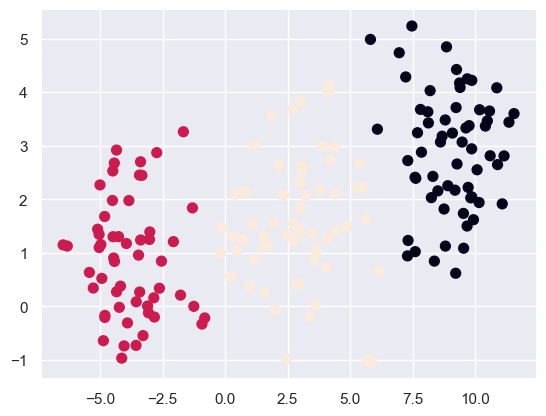

In [26]:
#Plot
X_wine = MinMaxScaler().fit_transform(wine.drop(columns={"Customer_Segment"}))
wine_t = TSNE(n_components=2, init='random', perplexity = 50).fit_transform(X_wine)
wine_k = KMeans(n_clusters=3)
clusters = wine_k.fit_predict(wine_t)
plt.scatter(wine_t[:,0], wine_t[:,1],s=50, c=clusters)
plt.scatter(wine_k[:,0], wine_k[:,1],s=50, c=clusters)

### Plot with Different Number of Clusters

We can cluster our data with a few different numbers of clusters to see what we get. 

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warn

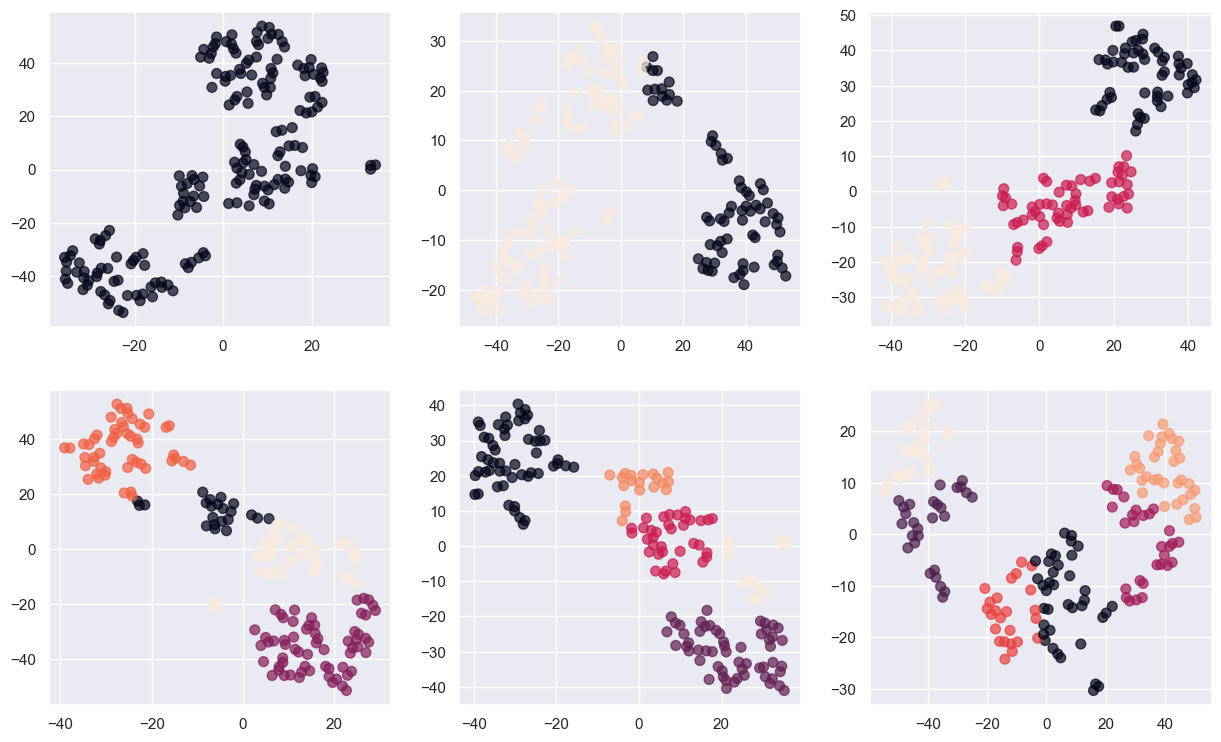

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
row = 0
col = 0
clust = [1,2,3,4,5,6]
for c in clust:
    wine_t = TSNE(n_components=2, init='random', perplexity = 8).fit_transform(X_wine)
    wine_k = KMeans(n_clusters=c)
    clusters = wine_k.fit_predict(wine_t)
    ax[row][col].scatter(wine_t[:,0], wine_t[:,1],s=50, c=clusters, alpha=.7)
    col += 1
    if col >= 3:
        col = 0
        row += 1
plt.show()

#### Check the "Correct" Number of Clusters

I will use a silhouette to see what the best number of clusters is. Then check the actual labels from the data to compare. 

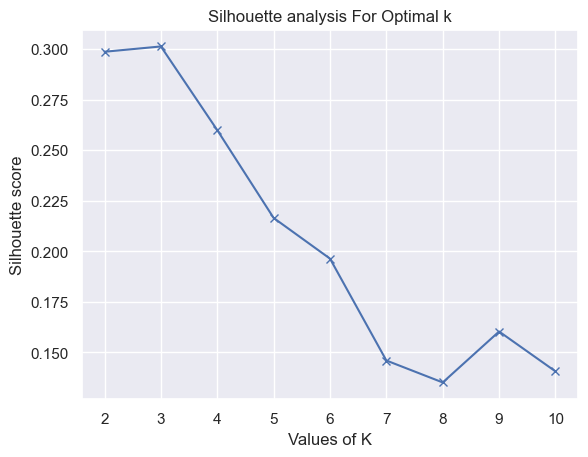

In [ ]:
#Silhouette Scores
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_wine)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X_wine, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [ ]:
wine["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64